<a href="https://colab.research.google.com/github/gmlessa/bootcamp-datascience-alura/blob/main/Super_Desafio_Modulo_1_Gustavo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

Objetivo principal: Fazer uma análise descritiva dos dados de casos de COVID-19, observando principalmente o número de casos e taxa de morte, e levantar hipóteses sobre um determinado tipo de comportamento que os dados possam ter.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
dados = pd.read_csv("https://raw.githubusercontent.com/gmlessa/bootcamp-datascience-alura/main/DADOS_CASOS_COVID19_MAR_2022.csv")

In [4]:
dados.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-27,AC,NaN,state,123808,1992,True,894470,12,13841.49273,0.0161
1,2022-03-27,AM,NaN,state,581070,14151,True,4207714,13,13809.63630,0.0244
2,2022-03-27,AP,NaN,state,160328,2122,True,861773,16,18604.43527,0.0132
3,2022-03-27,BA,NaN,state,1530054,29658,True,14930634,29,10247.74969,0.0194
4,2022-03-27,CE,NaN,state,1239746,26708,True,9187103,23,13494.41712,0.0215


In [5]:
dados.tail()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
19757,2020-02-29,SP,NaN,state,2,0,False,46289333,35,0.00432,0.0
19758,2020-02-28,SP,NaN,state,2,0,False,46289333,35,0.00432,0.0
19759,2020-02-27,SP,NaN,state,1,0,False,46289333,35,0.00216,0.0
19760,2020-02-26,SP,NaN,state,1,0,False,46289333,35,0.00216,0.0
19761,2020-02-25,SP,NaN,state,1,0,False,46289333,35,0.00216,0.0


In [6]:
dados.shape

(19762, 11)

In [7]:
#Verificando se existem dados vazios no banco de dados
(dados.isna()).value_counts()

date   state  city  place_type  confirmed  deaths  is_last  estimated_population  city_ibge_code  confirmed_per_100k_inhabitants  death_rate
False  False  True  False       False      False   False    False                 False           False                           False         19756
                                                                                                  True                            False             6
dtype: int64

In [8]:
#Verificando mais a fundo os dados faltantes
dados.query("confirmed_per_100k_inhabitants.isnull()", engine="python")

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
19649,2020-03-17,PB,NaN,state,0,0,False,4039277,25,NaN,0.0
19662,2020-03-16,PB,NaN,state,0,0,False,4039277,25,NaN,0.0
19676,2020-03-15,PB,NaN,state,0,0,False,4039277,25,NaN,0.0
19685,2020-03-14,PB,NaN,state,0,0,False,4039277,25,NaN,0.0
19697,2020-03-13,PB,NaN,state,0,0,False,4039277,25,NaN,0.0
19709,2020-03-12,PB,NaN,state,0,0,False,4039277,25,NaN,0.0


Foi verificado que os dados faltantes na coluna "confirmed_per_100k_inhabitants" são por conta que não existem casos confirmados no dia, portanto o número de casos para cada 100k habitantes também será zero. Portanto faremos este tratamento nesta coluna, substituiremos NaN por 0.

In [9]:
#Fazendo a substituição de NaN por 0
dados['confirmed_per_100k_inhabitants'].fillna(0, inplace=True)

In [10]:
#Verificando se o tratamento funcionou
dados['confirmed_per_100k_inhabitants'].isna().value_counts()

False    19762
Name: confirmed_per_100k_inhabitants, dtype: int64

As colunas "city" e "place_type" não são interessantes para esta análise, já que ao baixar o arquivo .csv do site, já tinha filtrado somente as Unidades Federativas, a coluna "is_last" também não é interessante para a análise, ela só indica se foi a última atualização, que foi em 27/03/2022, então irei retirar estas colunas do banco de dados.

In [11]:
dados.drop(["city", "place_type", "is_last"], axis=1, inplace=True)

In [12]:
dados.head()

,date,state,confirmed,deaths,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-27,AC,123808,1992,894470,12,13841.49273,0.0161
1,2022-03-27,AM,581070,14151,4207714,13,13809.63630,0.0244
2,2022-03-27,AP,160328,2122,861773,16,18604.43527,0.0132
3,2022-03-27,BA,1530054,29658,14930634,29,10247.74969,0.0194
4,2022-03-27,CE,1239746,26708,9187103,23,13494.41712,0.0215


Quero fazer a análise dos dados mês a mês, então irei criar uma coluna com o ano/mês

In [13]:
dados["ano/mes"] = pd.to_datetime(dados['date']).dt.strftime('%Y/%m')
dados["ano/mes"]

0        2022/03
1        2022/03
2        2022/03
3        2022/03
4        2022/03
          ...   
19757    2020/02
19758    2020/02
19759    2020/02
19760    2020/02
19761    2020/02
Name: ano/mes, Length: 19762, dtype: object

In [14]:
dados['deaths'].sum()

246342255

In [15]:
dados['confirmed'].sum()

9199173558

As colunas de casos confirmados e mortes estão preenchidas de modo cumulativo, preciso fazer com que sejam somente casos novos para fazer as análises.

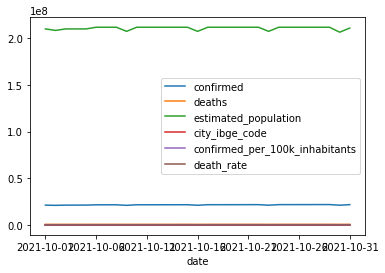

In [16]:
dados.query("'2021-11-01' > date >= '2021-10-01'").groupby('date').sum().plot()

In [17]:
lista_dfs = []
for estado in pd.unique(dados['state']):
  lista_dfs.append(dados.query(f"state == '{estado}'")[['confirmed']].diff(periods=-1).fillna(0))

In [18]:
lista_dfs[1]

,confirmed
1,28.0
22,33.0
46,39.0
73,69.0
100,55.0
...,...
19551,4.0
19577,4.0
19602,1.0
19622,0.0


In [19]:
dados["novos_casos"] = pd.concat(lista_dfs).sort_index()

In [20]:
dados

,date,state,confirmed,deaths,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,ano/mes,novos_casos
0,2022-03-27,AC,123808,1992,894470,12,13841.49273,0.0161,2022/03,31.0
1,2022-03-27,AM,581070,14151,4207714,13,13809.63630,0.0244,2022/03,28.0
2,2022-03-27,AP,160328,2122,861773,16,18604.43527,0.0132,2022/03,7.0
3,2022-03-27,BA,1530054,29658,14930634,29,10247.74969,0.0194,2022/03,1046.0
4,2022-03-27,CE,1239746,26708,9187103,23,13494.41712,0.0215,2022/03,44.0
...,...,...,...,...,...,...,...,...,...,...
19757,2020-02-29,SP,2,0,46289333,35,0.00432,0.0000,2020/02,0.0
19758,2020-02-28,SP,2,0,46289333,35,0.00432,0.0000,2020/02,1.0
19759,2020-02-27,SP,1,0,46289333,35,0.00216,0.0000,2020/02,0.0
19760,2020-02-26,SP,1,0,46289333,35,0.00216,0.0000,2020/02,0.0


In [21]:
novas_mortes = []

for estado in pd.unique(dados['state']):
  novas_mortes.append(dados.query(f"state == '{estado}'")[['deaths']].diff(periods=-1).fillna(0))

In [22]:
dados["novas_mortes"] = pd.concat(novas_mortes).sort_index()

In [23]:
#Adicionando uma coluna região no banco de dados
dados['regiao'] = dados['city_ibge_code'].map(lambda x: "Norte" if 10<x<20 else
                                                           ("Sul" if 40<x<50 else
                                                            ("Nordeste" if 20<x<30 else
                                                             ("Sudeste" if 30<x<40 else "Centro-Oeste"))))

In [24]:
dados_agrupados_por_regiao = dados.query("date == '2022-03-27'").groupby(["regiao"]).sum()
dados_agrupados_por_regiao = dados_agrupados_por_regiao.reset_index()
dados_agrupados_por_regiao

,regiao,confirmed,deaths,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,novos_casos,novas_mortes
0,Centro-Oeste,1994506,41066,10639760,103,38401.62994,0.0411,544.0,5.0
1,Nordeste,5006279,105099,47207055,152,67736.55885,0.1269,2707.0,27.0
2,Norte,2008442,43516,16451162,67,76717.83115,0.0961,513.0,1.0
3,Sudeste,11665780,314895,89012240,131,64375.16151,0.0990,4574.0,74.0
4,Sul,6343015,103529,30192315,126,63769.56173,0.0480,1973.0,2.0


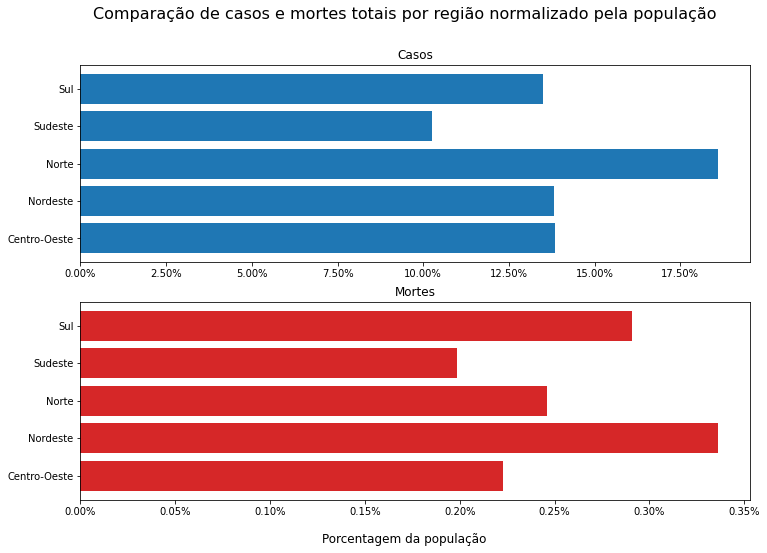

In [25]:
dados_agrupados_por_regiao["confirmed_normalizado"] = (dados["confirmed"]/dados["estimated_population"]*100)
dados_agrupados_por_regiao["deaths_normalizado"] = (dados["deaths"]/dados["estimated_population"]*100)

fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_size_inches(12,8)
fig.suptitle("Comparação de casos e mortes totais por região normalizado pela população", fontsize=16)
fig.text(0.5, 0.05, "Porcentagem da população", ha="center", fontsize=12)

ax1.barh("regiao", "confirmed_normalizado", data = dados_agrupados_por_regiao)
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}%"));
ax1.title.set_text("Casos")

ax2.barh("regiao", "deaths_normalizado", data = dados_agrupados_por_regiao, color="tab:red")
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}%"));
ax2.title.set_text("Mortes")

É possível visualizarmos que a região Norte foi a que teve mais casos em relação a sua população, mas a região Nordeste foi a que mais teve mortes. O que pode indicar que é a região menos preparada para tratar pessoas com Covid.

In [26]:
dados_agrupados = dados[["regiao","ano/mes","novos_casos", "novas_mortes", "confirmed", "deaths"]].groupby("ano/mes").sum()

In [27]:
dados_agrupados

,novos_casos,novas_mortes,confirmed,deaths
ano/mes,,,,
2020/02,1.0,0.0,7,0
2020/03,5773.0,202.0,37542,994
2020/04,81302.0,5778.0,1055102,66940
2020/05,428968.0,23387.0,7979856,510305
2020/06,896570.0,30424.0,28270425,1356055
2020/07,1257787.0,32936.0,62663570,2362889
2020/08,1244378.0,28891.0,102662834,3326800
2020/09,902536.0,22346.0,132059175,4002712
2020/10,720398.0,16008.0,160143379,4709105


In [28]:
dados_agrupados = dados_agrupados.reset_index()
dados_agrupados

,ano/mes,novos_casos,novas_mortes,confirmed,deaths
0,2020/02,1.0,0.0,7,0
1,2020/03,5773.0,202.0,37542,994
2,2020/04,81302.0,5778.0,1055102,66940
3,2020/05,428968.0,23387.0,7979856,510305
4,2020/06,896570.0,30424.0,28270425,1356055
5,2020/07,1257787.0,32936.0,62663570,2362889
6,2020/08,1244378.0,28891.0,102662834,3326800
7,2020/09,902536.0,22346.0,132059175,4002712
8,2020/10,720398.0,16008.0,160143379,4709105
9,2020/11,804202.0,13296.0,171820155,4814648


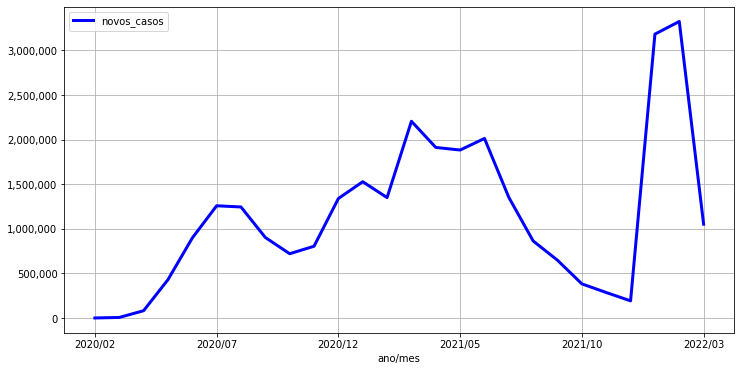

In [29]:
ax = dados_agrupados.plot(x="ano/mes",y="novos_casos",linestyle='-', color="blue", lw="3", figsize=(12,6), grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"));

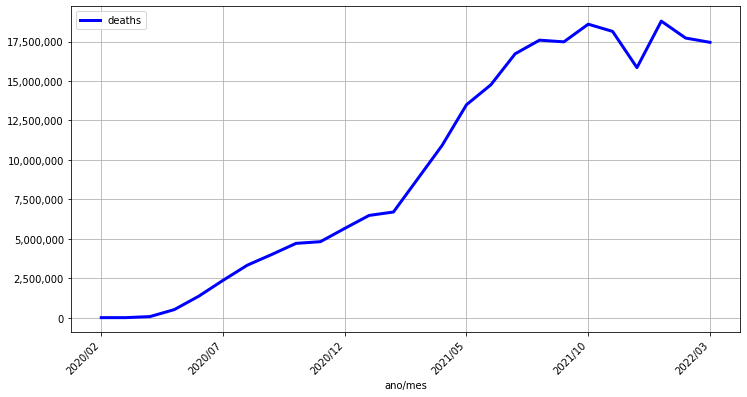

In [30]:
ax = dados_agrupados.plot(x="ano/mes",y="deaths",linestyle='-', color="blue", lw="3", figsize=(12,6), grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha = "right");

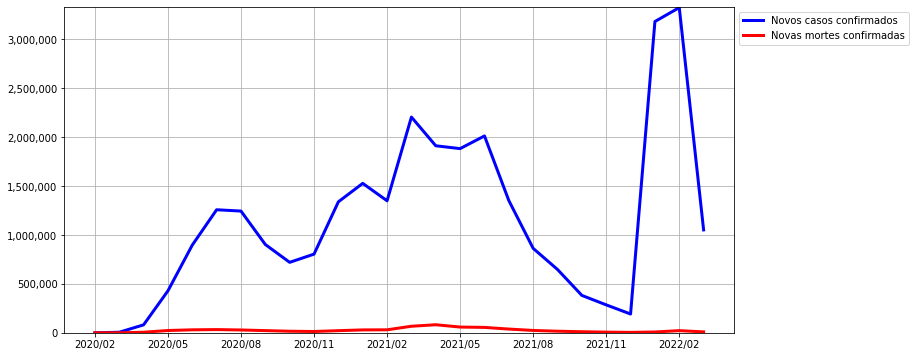

In [31]:
plt.plot("ano/mes","novos_casos", data=dados_agrupados,linestyle='-', color="blue", lw="3")
plt.plot("ano/mes","novas_mortes", data=dados_agrupados,linestyle='-', color="red", lw="3")
plt.legend(loc="best", bbox_to_anchor=(1.0005, 1), labels=["Novos casos confirmados", "Novas mortes confirmadas"])
plt.xticks(dados_agrupados["ano/mes"].iloc[::3].tolist());
plt.ylim(0, dados_agrupados["novos_casos"].max()+10000)
plt.grid()
plt.gcf().set_size_inches(12, 6)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

Juntar as duas curvas fica inviável de comparar, portanto irei fazer dois gráficos lado a lado para melhor comparação

Text(0, 0.5, 'Quantidade de novas mortes confirmados por mês')

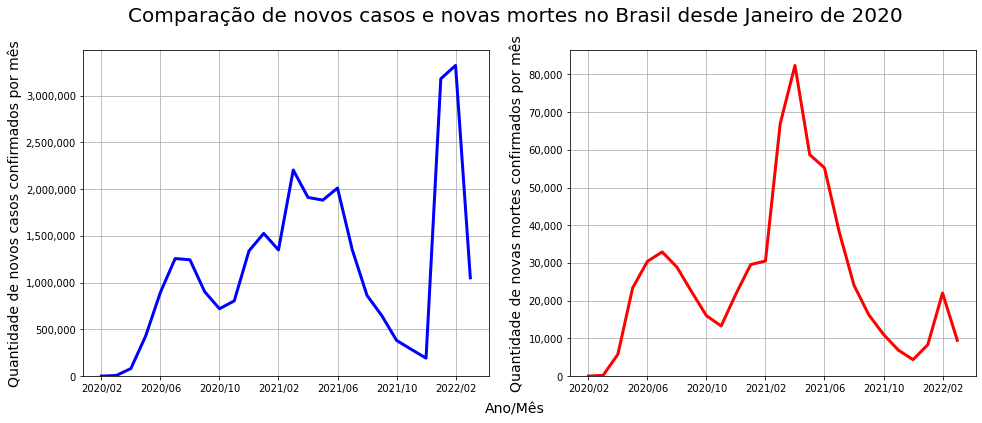

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparação de novos casos e novas mortes no Brasil desde Janeiro de 2020', fontsize=20)
fig.set_size_inches(16,6)
fig.align_labels()
fig.text(0.5, 0.04, 'Ano/Mês', ha='center', fontsize=14)

ax1.plot("ano/mes","novos_casos", data=dados_agrupados,linestyle='-', color="blue", lw="3")
ax1.set_xticks(dados_agrupados["ano/mes"].iloc[::4].tolist())
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax1.grid()
ax1.set_ylim(0)
ax1.set_ylabel("Quantidade de novos casos confirmados por mês", fontsize=14)

ax2.plot("ano/mes","novas_mortes", data=dados_agrupados,linestyle='-', color="red", lw="3")
ax2.set_xticks(dados_agrupados["ano/mes"].iloc[::4].tolist())
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax2.grid()
ax2.set_ylim(0)
ax2.set_ylabel("Quantidade de novas mortes confirmados por mês", fontsize=14)

É possível observar que a curva de novas mortes acompanha a curva de novos casos na maior parte do gráfico. No entanto, ao observarmos os meses de Janeiro e fevereiro de 2022, vemos um pico enorme no número de novos casos, mas o número de mortes não chega nem perto. Isto deve ocorrer por conta da vacinação, portanto irei pegar um banco de dados de vacinação e tentar verificar isto.

In [33]:
#Pegando dados de vacinação do Brasil
dados_vacinacao = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/Brazil.csv")

Fonte dos dados: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data/Brazil.csv

Extraído em 09/06/2022

In [34]:
dados_vacinacao

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Brazil,2021-01-17,Sinovac,https://coronavirusbra1.github.io,112,112.0,0.0,0
1,Brazil,2021-01-18,Sinovac,https://coronavirusbra1.github.io,1109,1109.0,0.0,0
2,Brazil,2021-01-19,Sinovac,https://coronavirusbra1.github.io,13527,13527.0,0.0,0
3,Brazil,2021-01-20,Sinovac,https://coronavirusbra1.github.io,105824,105824.0,0.0,0
4,Brazil,2021-01-21,Sinovac,https://coronavirusbra1.github.io,193699,193699.0,0.0,0
...,...,...,...,...,...,...,...,...
485,Brazil,2022-06-05,"Johnson&Johnson, Pfizer/BioNTech, Oxford/Astra...",https://coronavirusbra1.github.io,443475532,184077691.0,166459996.0,98221657
486,Brazil,2022-06-06,"Johnson&Johnson, Pfizer/BioNTech, Oxford/Astra...",https://coronavirusbra1.github.io,443829496,184091855.0,166493992.0,98528751
487,Brazil,2022-06-07,"Johnson&Johnson, Pfizer/BioNTech, Oxford/Astra...",https://coronavirusbra1.github.io,444537453,184130468.0,166572602.0,99120969
488,Brazil,2022-06-08,"Johnson&Johnson, Pfizer/BioNTech, Oxford/Astra...",https://coronavirusbra1.github.io,445097070,184150383.0,166737175.0,99499887


In [35]:
#Retirando colunas que não serão utilizadas
dados_vacinacao.drop(["location", "vaccine", "source_url"], axis=1, inplace=True)

In [36]:
dados_vacinacao.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,2021-01-17,112,112.0,0.0,0
1,2021-01-18,1109,1109.0,0.0,0
2,2021-01-19,13527,13527.0,0.0,0
3,2021-01-20,105824,105824.0,0.0,0
4,2021-01-21,193699,193699.0,0.0,0


In [37]:
#Criando a coluna ano/mes
dados_vacinacao["ano/mes"] = pd.to_datetime(dados_vacinacao['date']).dt.strftime('%Y/%m')
dados_vacinacao["ano/mes"]

0      2021/01
1      2021/01
2      2021/01
3      2021/01
4      2021/01
        ...   
485    2022/06
486    2022/06
487    2022/06
488    2022/06
489    2022/06
Name: ano/mes, Length: 490, dtype: object

In [38]:
#Invertendo a ordem do banco de dados para ficar igual ao outro banco
dados_vacinacao.sort_values("date", ascending=False, inplace=True)

In [39]:
dados_vacinacao

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,ano/mes
489,2022-06-09,446745262,184254911.0,167910796.0,99871092,2022/06
488,2022-06-08,445097070,184150383.0,166737175.0,99499887,2022/06
487,2022-06-07,444537453,184130468.0,166572602.0,99120969,2022/06
486,2022-06-06,443829496,184091855.0,166493992.0,98528751,2022/06
485,2022-06-05,443475532,184077691.0,166459996.0,98221657,2022/06
...,...,...,...,...,...,...
4,2021-01-21,193699,193699.0,0.0,0,2021/01
3,2021-01-20,105824,105824.0,0.0,0,2021/01
2,2021-01-19,13527,13527.0,0.0,0,2021/01
1,2021-01-18,1109,1109.0,0.0,0,2021/01


In [40]:
dados_vacinacao["novas_pessoas_totalmente_vacinadas"] = dados_vacinacao[['people_fully_vaccinated']].diff(periods=-1).fillna(0)
dados_vacinacao["novas_pessoas_vacinadas"] = dados_vacinacao[['people_vaccinated']].diff(periods=-1).fillna(0)
dados_vacinacao["novas_pessoas_com_dose_reforco"] = dados_vacinacao[['total_boosters']].diff(periods=-1).fillna(0)

In [41]:
dados_vacinacao

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,ano/mes,novas_pessoas_totalmente_vacinadas,novas_pessoas_vacinadas,novas_pessoas_com_dose_reforco
489,2022-06-09,446745262,184254911.0,167910796.0,99871092,2022/06,1173621.0,104528.0,371205.0
488,2022-06-08,445097070,184150383.0,166737175.0,99499887,2022/06,164573.0,19915.0,378918.0
487,2022-06-07,444537453,184130468.0,166572602.0,99120969,2022/06,78610.0,38613.0,592218.0
486,2022-06-06,443829496,184091855.0,166493992.0,98528751,2022/06,33996.0,14164.0,307094.0
485,2022-06-05,443475532,184077691.0,166459996.0,98221657,2022/06,35490.0,15310.0,146628.0
...,...,...,...,...,...,...,...,...,...
4,2021-01-21,193699,193699.0,0.0,0,2021/01,0.0,87875.0,0.0
3,2021-01-20,105824,105824.0,0.0,0,2021/01,0.0,92297.0,0.0
2,2021-01-19,13527,13527.0,0.0,0,2021/01,0.0,12418.0,0.0
1,2021-01-18,1109,1109.0,0.0,0,2021/01,0.0,997.0,0.0


In [42]:
dados_agrupados_vacinacao = dados_vacinacao[["ano/mes","novas_pessoas_totalmente_vacinadas", 
                                             "novas_pessoas_vacinadas", "novas_pessoas_com_dose_reforco"]].groupby("ano/mes").sum()
dados_agrupados_vacinacao = dados_agrupados_vacinacao.reset_index()
dados_agrupados_vacinacao

,ano/mes,novas_pessoas_totalmente_vacinadas,novas_pessoas_vacinadas,novas_pessoas_com_dose_reforco
0,2021/01,0.0,2084007.0,0.0
1,2021/02,1923197.0,4458087.0,0.0
2,2021/03,3170358.0,11203526.0,0.0
3,2021/04,10608803.0,13951060.0,0.0
4,2021/05,6635121.0,14631376.0,0.0
5,2021/06,4304998.0,28769105.0,0.0
6,2021/07,14865491.0,29986307.0,0.0
7,2021/08,21190792.0,31043465.0,0.0
8,2021/09,28731444.0,15293879.0,1095300.0
9,2021/10,24687346.0,8168227.0,7702963.0


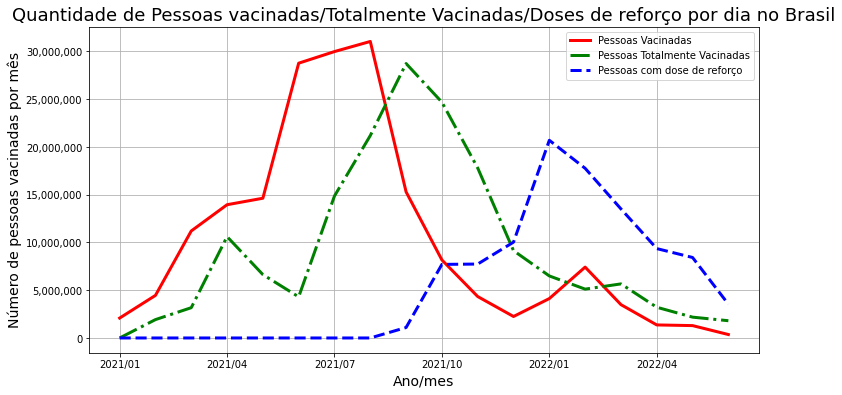

In [43]:
plt.plot("ano/mes", "novas_pessoas_vacinadas", data= dados_agrupados_vacinacao, linestyle='-', color="red", lw="3")
plt.plot("ano/mes", "novas_pessoas_totalmente_vacinadas", data= dados_agrupados_vacinacao, linestyle='-.', color="green", lw="3")
plt.plot("ano/mes", "novas_pessoas_com_dose_reforco", data= dados_agrupados_vacinacao, linestyle='--', color="blue", lw="3")

plt.title("Quantidade de Pessoas vacinadas/Totalmente Vacinadas/Doses de reforço por dia no Brasil", fontsize=18)
plt.ylabel("Número de pessoas vacinadas por mês", fontsize=14)
plt.xlabel("Ano/mes", fontsize=14)
plt.legend(loc="best", bbox_to_anchor=(1.0005, 1), labels=["Pessoas Vacinadas", "Pessoas Totalmente Vacinadas", "Pessoas com dose de reforço"])
plt.xticks(dados_agrupados_vacinacao["ano/mes"].iloc[::3].tolist());

plt.grid()
plt.gcf().set_size_inches(12, 6)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

É possível ver que as pessoas começaram a se vacinar em Janeiro de 2021, mas teve uma queda ou desaceleração em Maio e Junho de 2021, isto ocorreu segundo a revista Veja, notícia de Junho de 2021: 

"Na semana passada, estavam previstas 20,9 milhões de doses da vacina da Fiocruz. Nesta quarta-feira, essa quantidade caiu para 18 milhões de vacinas. Já o Instituto Butantan vai entregar 1 milhão de doses a menos: na semana passada, a expectativa era de pouco mais de 6 milhões de doses para o Programa Nacional de Imunizações (PNI) até o final deste mês. Agora, serão apenas 5 milhões, mesma quantidade entregue no mês de maio.".

Além disso, vemos um pico de vacinação tanto de primeira, segunda e terceira dose da vacina, no entanto a diferença entre os picos foi aumentando, muito provavelmente porque a população começou a parar de acreditar na vacina, já que com o início da vacinação, os números de casos não pararam de subir subtamente, levando a uma crença de que a vacina não estava funcionando, fora os métodos alternativos de tratamento que foram promovidos.

Fontes: https://veja.abril.com.br/saude/ministerio-da-saude-reduz-novamente-numero-de-doses-prevista-para-junho/

https://canalmynews.com.br/politica/brasil-ve-brigas-politicas-e-descrenca-em-torno-de-vacinacao-contra-covid-19/

Agora que se tem um pouco mais de conhecimento sobre a campanha de vacinação e os casos de covid pelo Brasil, iremos comparar e testar se a vacinação influenciou no número de casos e de mortes

In [44]:
dados_agrupados_completo = dados_agrupados.set_index("ano/mes").join(dados_agrupados_vacinacao.set_index("ano/mes")).fillna(0)
dados_agrupados_completo = dados_agrupados_completo.reset_index()
dados_agrupados_completo

,ano/mes,novos_casos,novas_mortes,confirmed,deaths,novas_pessoas_totalmente_vacinadas,novas_pessoas_vacinadas,novas_pessoas_com_dose_reforco
0,2020/02,1.0,0.0,7,0,0.0,0.0,0.0
1,2020/03,5773.0,202.0,37542,994,0.0,0.0,0.0
2,2020/04,81302.0,5778.0,1055102,66940,0.0,0.0,0.0
3,2020/05,428968.0,23387.0,7979856,510305,0.0,0.0,0.0
4,2020/06,896570.0,30424.0,28270425,1356055,0.0,0.0,0.0
5,2020/07,1257787.0,32936.0,62663570,2362889,0.0,0.0,0.0
6,2020/08,1244378.0,28891.0,102662834,3326800,0.0,0.0,0.0
7,2020/09,902536.0,22346.0,132059175,4002712,0.0,0.0,0.0
8,2020/10,720398.0,16008.0,160143379,4709105,0.0,0.0,0.0
9,2020/11,804202.0,13296.0,171820155,4814648,0.0,0.0,0.0


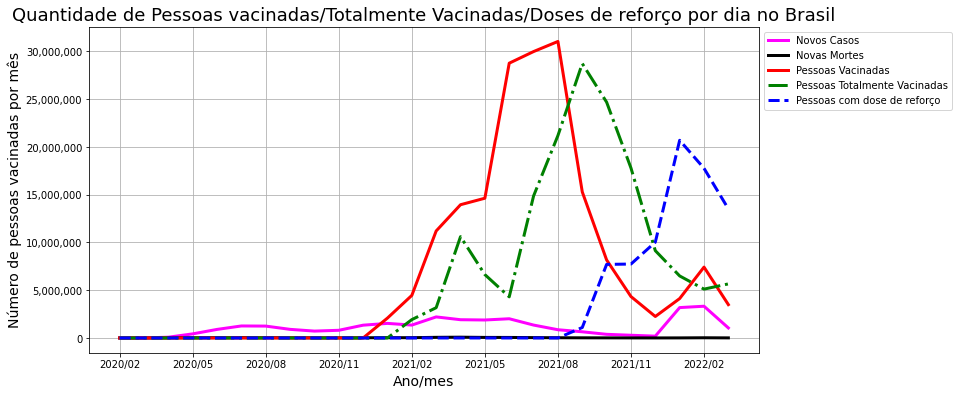

In [45]:

plt.plot("ano/mes", "novos_casos", data= dados_agrupados_completo, linestyle='-', color="magenta", lw="3")
plt.plot("ano/mes", "novas_mortes", data= dados_agrupados_completo, linestyle='-', color="black", lw="3")
plt.plot("ano/mes", "novas_pessoas_vacinadas", data= dados_agrupados_completo, linestyle='-', color="red", lw="3")
plt.plot("ano/mes", "novas_pessoas_totalmente_vacinadas", data= dados_agrupados_completo, linestyle='-.', color="green", lw="3")
plt.plot("ano/mes", "novas_pessoas_com_dose_reforco", data= dados_agrupados_completo, linestyle='--', color="blue", lw="3")

plt.title("Quantidade de Pessoas vacinadas/Totalmente Vacinadas/Doses de reforço por dia no Brasil", fontsize=18)
plt.ylabel("Número de pessoas vacinadas por mês", fontsize=14)
plt.xlabel("Ano/mes", fontsize=14)
plt.legend(loc="best", bbox_to_anchor=(1.0005, 1), labels=["Novos Casos", "Novas Mortes", "Pessoas Vacinadas", "Pessoas Totalmente Vacinadas", "Pessoas com dose de reforço"])
plt.xticks(dados_agrupados_completo["ano/mes"].iloc[::3].tolist());

plt.grid()
plt.gcf().set_size_inches(12, 6)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

As escalas são muito diferentes, portanto, irei separar os número de casos e o número de mortes para melhor visualização

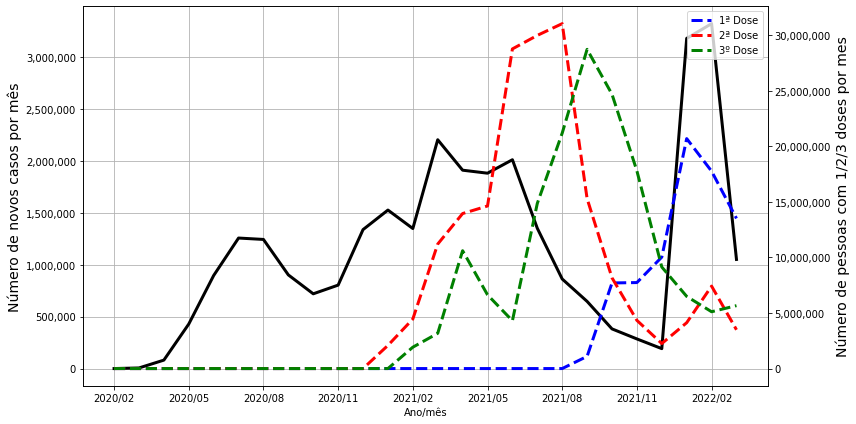

In [46]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12,6)

ax1.set_xlabel('Ano/mês')
ax1.set_ylabel('Número de novos casos por mês', color="black", fontsize=14)
ax1.plot("ano/mes", "novos_casos", data= dados_agrupados_completo, linestyle='-', color="black", lw="3")
ax1.tick_params(axis='y', labelcolor="black")
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax1.grid()

ax2 = ax1.twinx()

ax2.set_ylabel('Número de pessoas com 1/2/3 doses por mes', color="black", fontsize=14)
ax2.plot("ano/mes", "novas_pessoas_com_dose_reforco", data= dados_agrupados_completo, linestyle='--', color="blue", lw="3")
ax2.plot("ano/mes", "novas_pessoas_vacinadas", data= dados_agrupados_completo, linestyle='--', color="red", lw="3")
ax2.plot("ano/mes", "novas_pessoas_totalmente_vacinadas", data= dados_agrupados_completo, linestyle='--', color="green", lw="3")
ax2.tick_params(axis='y', labelcolor="black")
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax2.legend(["1ª Dose", "2ª Dose", "3º Dose"])

plt.xticks(dados_agrupados_completo["ano/mes"].iloc[::3].tolist());

fig.tight_layout()
plt.show()


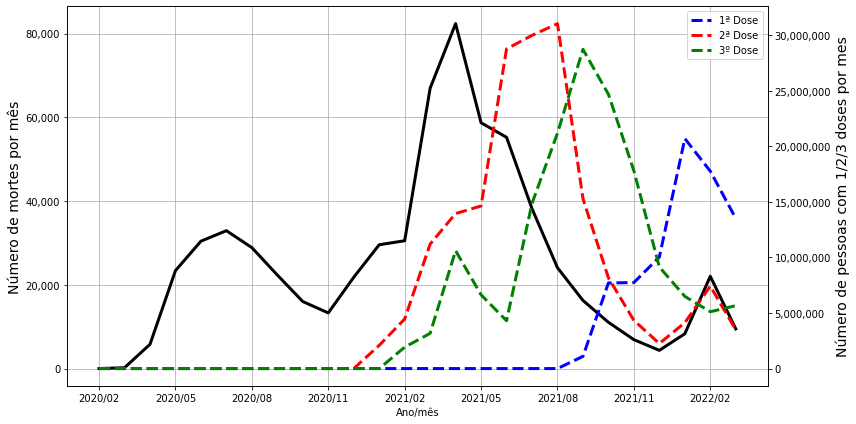

In [47]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12,6)

ax1.set_xlabel('Ano/mês')
ax1.set_ylabel('Número de mortes por mês', color="black", fontsize=14)
ax1.plot("ano/mes", "novas_mortes", data= dados_agrupados_completo, linestyle='-', color="black", lw="3")
ax1.tick_params(axis='y', labelcolor="black")
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax1.grid()

ax2 = ax1.twinx()

ax2.set_ylabel('Número de pessoas com 1/2/3 doses por mes', color="black", fontsize=14)
ax2.plot("ano/mes", "novas_pessoas_com_dose_reforco", data= dados_agrupados_completo, linestyle='--', color="blue", lw="3")
ax2.plot("ano/mes", "novas_pessoas_vacinadas", data= dados_agrupados_completo, linestyle='--', color="red", lw="3")
ax2.plot("ano/mes", "novas_pessoas_totalmente_vacinadas", data= dados_agrupados_completo, linestyle='--', color="green", lw="3")
ax2.tick_params(axis='y', labelcolor="black")
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax2.legend(["1ª Dose", "2ª Dose", "3º Dose"])

plt.xticks(dados_agrupados_completo["ano/mes"].iloc[::3].tolist());

fig.tight_layout()
plt.show()

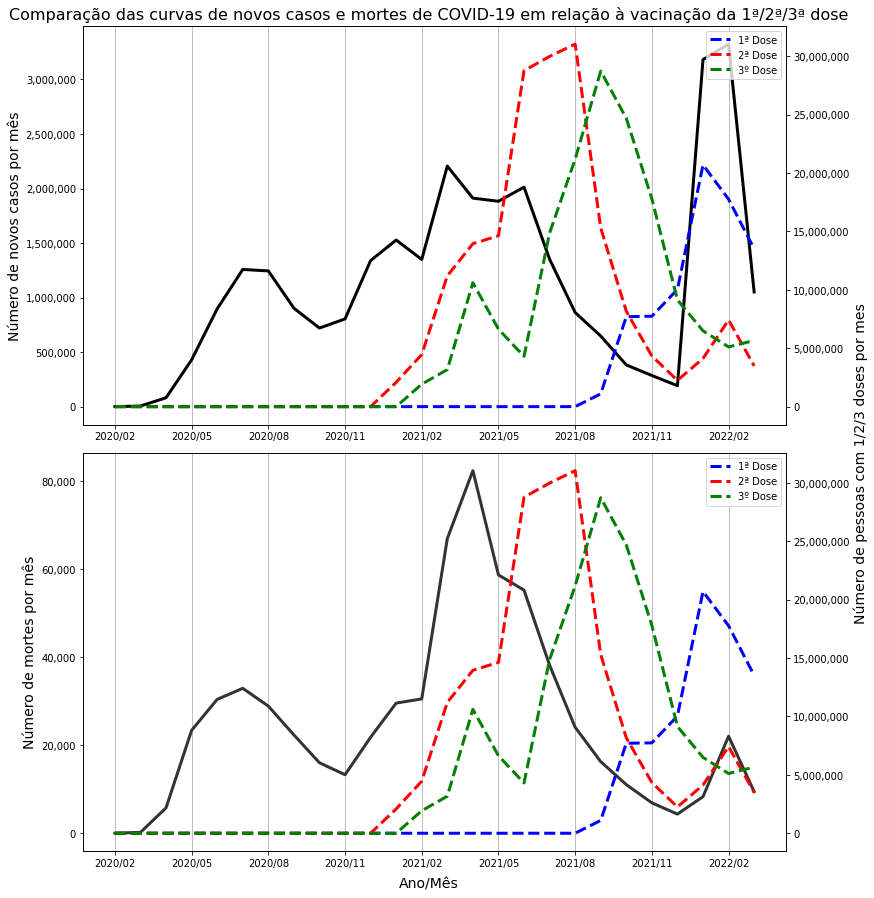

In [48]:
fig, (ax1, ax3) = plt.subplots(2,1)
fig.set_size_inches(12,12)
fig.text(0.5, -0.01, 'Ano/Mês', ha='center', fontsize=14)
fig.text(1, 0.3, 'Número de pessoas com 1/2/3 doses por mes', ha='center', fontsize=14, rotation=90)
fig.suptitle('Comparação das curvas de novos casos e mortes de COVID-19 em relação à vacinação da 1ª/2ª/3ª dose', fontsize=16, y=1.01)

ax1.set_ylabel('Número de novos casos por mês', color="black", fontsize=14)
ax1.plot("ano/mes", "novos_casos", data= dados_agrupados_completo, linestyle='-', color="black", lw="3")
ax1.tick_params(axis='y', labelcolor="black")
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax1.grid(axis='x')

ax2 = ax1.twinx()

ax2.plot("ano/mes", "novas_pessoas_com_dose_reforco", data= dados_agrupados_completo, linestyle='--', color="blue", lw="3")
ax2.plot("ano/mes", "novas_pessoas_vacinadas", data= dados_agrupados_completo, linestyle='--', color="red", lw="3")
ax2.plot("ano/mes", "novas_pessoas_totalmente_vacinadas", data= dados_agrupados_completo, linestyle='--', color="green", lw="3")
ax2.tick_params(axis='y', labelcolor="black")
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax2.legend(["1ª Dose", "2ª Dose", "3º Dose"])

plt.xticks(dados_agrupados_completo["ano/mes"].iloc[::3].tolist());

ax3.set_ylabel('Número de mortes por mês', color="black", fontsize=14)
ax3.plot("ano/mes", "novas_mortes", data= dados_agrupados_completo, linestyle='-', color="#333333", lw="3")
ax3.tick_params(axis='y', labelcolor="black")
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax3.grid(axis='x')

ax4 = ax3.twinx()

ax4.plot("ano/mes", "novas_pessoas_com_dose_reforco", data= dados_agrupados_completo, linestyle='--', color="blue", lw="3")
ax4.plot("ano/mes", "novas_pessoas_vacinadas", data= dados_agrupados_completo, linestyle='--', color="red", lw="3")
ax4.plot("ano/mes", "novas_pessoas_totalmente_vacinadas", data= dados_agrupados_completo, linestyle='--', color="green", lw="3")
ax4.tick_params(axis='y', labelcolor="black")
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax4.legend(["1ª Dose", "2ª Dose", "3º Dose"])

plt.xticks(dados_agrupados_completo["ano/mes"].iloc[::3].tolist());

fig.tight_layout()
plt.show()

In [49]:
dados_agrupados_completo[["novos_casos", "novas_mortes"]]

,novos_casos,novas_mortes
0,1.0,0.0
1,5773.0,202.0
2,81302.0,5778.0
3,428968.0,23387.0
4,896570.0,30424.0
5,1257787.0,32936.0
6,1244378.0,28891.0
7,902536.0,22346.0
8,720398.0,16008.0
9,804202.0,13296.0


In [50]:
pico_casos_2021 = dados_agrupados_completo["novos_casos"][13]
pico_mortes_2021 = dados_agrupados_completo["novas_mortes"][14]
pico_casos_2022 = dados_agrupados_completo["novos_casos"][23]
pico_mortes_2022 = dados_agrupados_completo["novas_mortes"][24]
mortalidade_no_pico_2021 = ((pico_mortes_2021/pico_casos_2021)*100).round(2)
mortalidade_no_pico_2022 = ((pico_mortes_2022/pico_casos_2022)*100).round(2)
comparacao_pico_casos = (pico_casos_2022/pico_casos_2021).round(2)
comparacao_pico_mortes = (pico_mortes_2021/pico_mortes_2022).round(2)


In [51]:
print(f"O número de casos de 2022 foi {comparacao_pico_casos} vezes maior que 2021, enquanto que o número de mortes em 2022 foi {comparacao_pico_mortes} vezes menor do que 2021.")

O número de casos de 2022 foi 1.44 vezes maior que 2021, enquanto que o número de mortes em 2022 foi 3.74 vezes menor do que 2021.


O número de casos de 2022 foi 1.44 vezes maior que 2021, enquanto que o número de mortes em 2022 foi 3.74 vezes menor do que 2021.


In [52]:
print(f"Em 2021, a mortalidade em um único mês chegou a {mortalidade_no_pico_2021}%, ou seja, entre 3 e 4 a cada 100 pessoas morreram de COVID no período. Enquanto que em 2022, a mortalidade foi de {mortalidade_no_pico_2022}%, ou seja, menos de 1 a cada 100 pessoas morreram de COVID neste período.", )

Em 2021, a mortalidade em um único mês chegou a 3.74%, ou seja, entre 3 e 4 a cada 100 pessoas morreram de COVID no período. Enquanto que em 2022, a mortalidade foi de 0.69%, ou seja, menos de 1 a cada 100 pessoas morreram de COVID neste período.


Em 2021, a mortalidade em um único mês chegou a 3.74%, ou seja, 3 a cada 100 pessoas morreram de COVID no período. Enquanto que em 2022, a mortalidade foi de 0.69%, ou seja, menos de 1 a cada 100 pessoas morreram de COVID neste período.


É possível visualizar que com a vacinação, até Dezembro de 20221, o número de casos e de mortes diminuíram com ao passo que a vacina começou a ser aplicada na população brasileira. No entanto, quando chegamos em Janeiro e Fevereiro de 2022, há uma explosão de novos casos, porém o número de mortos é muito menor (3.74 vezes menor) quando comparado ao pico de casos em meados de abril de 2021. Isso é explicado por conta da variante Ômicron, onde teve um surto em Janeiro de 2022, já que a vacina não previnia completamente a pessoa de contrair a doença, mas diminuiu muito a chance da pessoa vir a óbito (0.69% de mortalidade).

Fontes: https://butantan.gov.br/noticias/seis-fatos-sobre-a-omicron-a-variante-mais-transmissivel-da-covid-19